In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Movie.csv")

data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,genres,production_companies,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer
0,2,Ariel,7.082,304,Released,1988-10-21,0.0,73,0.0,tt0094675,...,"Drama, Comedy, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Markku Rantala, Esko Nikkari, Matti Pellonpää,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN
1,3,Shadows in Paradise,7.302,344,Released,1986-10-17,0.0,74,0.0,tt0092149,...,"Drama, Comedy, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Esko Nikkari, Matti Pellonpää, Sirkka Silin, H...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN
2,5,Four Rooms,5.800,2534,Released,1995-12-09,4257354.0,98,4000000.0,tt0113101,...,Comedy,"Miramax, A Band Apart",United States of America,English,"Amanda de Cadenet, Antonio Banderas, Madonna, ...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Guillermo Navarro, Phil Parmet, Rodrigo García...","Alexandre Rockwell, Robert Rodriguez, Quentin ...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison
3,6,Judgment Night,6.527,316,Released,1993-10-15,12136938.0,109,21000000.0,tt0107286,...,"Action, Crime, Thriller","Largo Entertainment, JVC, Universal Pictures",United States of America,English,"Everlast, Peter Greene, Michael DeLorenzo, Den...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri
4,8,Life in Loops (A Megacities RMX),7.500,27,Released,2006-01-01,0.0,80,42000.0,tt0825671,...,Documentary,inLoops,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN


In [2]:
data.drop(columns=['vote_count','revenue','budget','id','production_companies','director_of_photography','writers','music_composer','overview','tagline','spoken_languages','production_countries', 'original_title', 'cast', 'director', 'producers' ], inplace=True)

data

,title,vote_average,status,release_date,runtime,imdb_id,original_language,popularity,genres
0,Ariel,7.082,Released,1988-10-21,73,tt0094675,fi,9.751,"Drama, Comedy, Romance, Crime"
1,Shadows in Paradise,7.302,Released,1986-10-17,74,tt0092149,fi,12.724,"Drama, Comedy, Romance"
2,Four Rooms,5.800,Released,1995-12-09,98,tt0113101,en,20.789,Comedy
3,Judgment Night,6.527,Released,1993-10-15,109,tt0107286,en,11.920,"Action, Crime, Thriller"
4,Life in Loops (A Megacities RMX),7.500,Released,2006-01-01,80,tt0825671,en,3.203,Documentary
...,...,...,...,...,...,...,...,...,...
905570,Mental Hospital Luz Santa,0.000,Released,NaN,3,NaN,en,0.000,NaN
905571,毬の行方,0.000,Released,NaN,50,NaN,en,0.000,NaN
905572,Red Flags,0.000,Released,NaN,0,NaN,en,0.000,NaN
905573,Wheatfield with Storm Approaching,0.000,Released,NaN,0,NaN,en,0.000,NaN


In [3]:
data['release_date'] = pd.to_datetime(data['release_date'])

categorical_cols = ['status', 'original_language', 'genres', 'imdb_id']
for col in categorical_cols:
    data[col] = data[col].astype('category')

print(data.dtypes)

title                        object
vote_average                float64
status                     category
release_date         datetime64[ns]
runtime                       int64
imdb_id                    category
original_language          category
popularity                  float64
genres                     category
dtype: object


In [4]:
data['release_date'] = pd.to_datetime(data['release_date'])

data_after_2010 = data[data['release_date'].dt.year > 2010]

cutoff_date = pd.to_datetime('2024-08-31')

data = data_after_2010[data_after_2010['release_date'] <= cutoff_date]

data

,title,vote_average,status,release_date,runtime,imdb_id,original_language,popularity,genres
148,Sin City: A Dame to Kill For,6.369,Released,2014-08-20,102,tt0458481,en,43.479,"Crime, Action, Thriller"
1164,Captain America: The First Avenger,6.999,Released,2011-07-22,124,tt0458339,en,48.690,"Action, Adventure, Science Fiction"
1238,Pirates of the Caribbean: On Stranger Tides,6.500,Released,2011-05-15,137,tt1298650,en,159.056,"Adventure, Action, Fantasy"
1294,The Amazing Spider-Man,6.697,Released,2012-06-23,136,tt0948470,en,76.022,"Action, Adventure, Science Fiction"
1530,Für ein paar Filme mehr...,0.000,Released,2017-01-01,30,NaN,de,0.600,Documentary
...,...,...,...,...,...,...,...,...,...
905452,Aking Senakulo,0.000,Released,2024-04-07,10,NaN,tl,0.000,NaN
905454,Ukraine: Enemy in the Woods,0.000,Post Production,2024-03-25,0,NaN,en,0.000,"Documentary, War"
905455,Roses,0.000,Released,2023-11-12,16,NaN,en,0.000,NaN
905465,Liberty,0.000,Released,2024-04-06,11,NaN,en,0.000,NaN


In [5]:
desired_status = ['Released', 'Post Production', 'In Production']

data = data[data['status'].isin(desired_status)]

data

,title,vote_average,status,release_date,runtime,imdb_id,original_language,popularity,genres
148,Sin City: A Dame to Kill For,6.369,Released,2014-08-20,102,tt0458481,en,43.479,"Crime, Action, Thriller"
1164,Captain America: The First Avenger,6.999,Released,2011-07-22,124,tt0458339,en,48.690,"Action, Adventure, Science Fiction"
1238,Pirates of the Caribbean: On Stranger Tides,6.500,Released,2011-05-15,137,tt1298650,en,159.056,"Adventure, Action, Fantasy"
1294,The Amazing Spider-Man,6.697,Released,2012-06-23,136,tt0948470,en,76.022,"Action, Adventure, Science Fiction"
1530,Für ein paar Filme mehr...,0.000,Released,2017-01-01,30,NaN,de,0.600,Documentary
...,...,...,...,...,...,...,...,...,...
905452,Aking Senakulo,0.000,Released,2024-04-07,10,NaN,tl,0.000,NaN
905454,Ukraine: Enemy in the Woods,0.000,Post Production,2024-03-25,0,NaN,en,0.000,"Documentary, War"
905455,Roses,0.000,Released,2023-11-12,16,NaN,en,0.000,NaN
905465,Liberty,0.000,Released,2024-04-06,11,NaN,en,0.000,NaN


In [12]:
data = data.dropna(subset=['runtime'])  
data = data[data['runtime'] >= 40]
data = data.dropna(subset=['imdb_id'])
data = data.dropna(subset=['genres'])
data = data.dropna(subset=['title'])

data

,title,vote_average,status,release_date,runtime,imdb_id,original_language,popularity,genres
24105,Grizzly II: Revenge,3.145,Released,2020-02-17,74,tt0093119,en,4.766,"Horror, Music, Thriller"
24291,Billy Joel - Live at Yankee Stadium,7.583,Released,2022-06-22,86,tt0215569,en,2.878,Music
31956,Strange Powers: Stephin Merritt and the Magnet...,6.700,Released,2011-10-27,89,tt1534075,en,1.904,"Documentary, Music"
33270,Peter Frampton: Live in Detroit,7.200,Released,2013-03-26,100,tt0262684,en,0.713,Music
35276,Separado!,5.700,Released,2011-06-18,84,tt1505405,en,0.683,"Documentary, Music"
...,...,...,...,...,...,...,...,...,...
900825,Six: The Fully Animated Musical,0.000,Released,2020-08-27,70,tt20235592,en,0.600,"Music, History, Comedy, Animation"
900867,King Serio,10.000,Released,2024-03-01,62,tt31546612,en,3.496,Music
900994,8 Kilsa,0.000,Released,2012-03-30,83,tt2178296,sv,0.840,"Drama, Comedy, Music"
901403,SUGA | Agust D TOUR ‘D-DAY’ THE MOVIE,0.000,Post Production,2024-04-10,84,tt31579728,ko,7.385,"Music, Documentary"


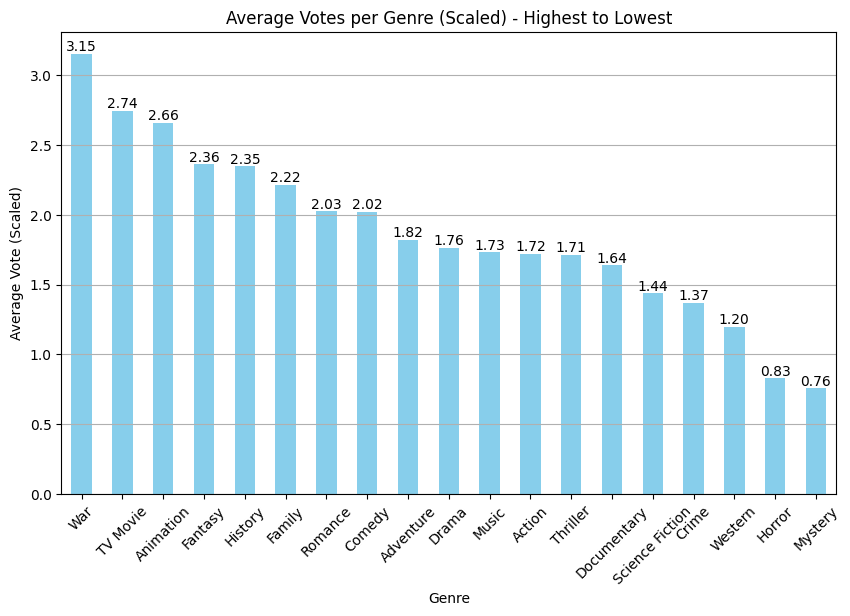

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame 'data'
# Assuming 'data' is your DataFrame

# Explode genres column
data_genres = data.assign(genres=data['genres'].str.split(', ')).explode('genres').reset_index(drop=True)

# Calculate average votes per genre
avg_votes_per_genre = data_genres.groupby('genres')['vote_average'].mean()

# Subtract 3.0 from each average vote value
avg_votes_per_genre_scaled = avg_votes_per_genre - 3.0

# Sort genres based on average vote in descending order
avg_votes_per_genre_scaled_sorted = avg_votes_per_genre_scaled.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
bars = avg_votes_per_genre_scaled_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Votes per Genre (Scaled) - Highest to Lowest')
plt.xlabel('Genre')
plt.ylabel('Average Vote (Scaled)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate each bar with its value
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', 
                 va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.show()


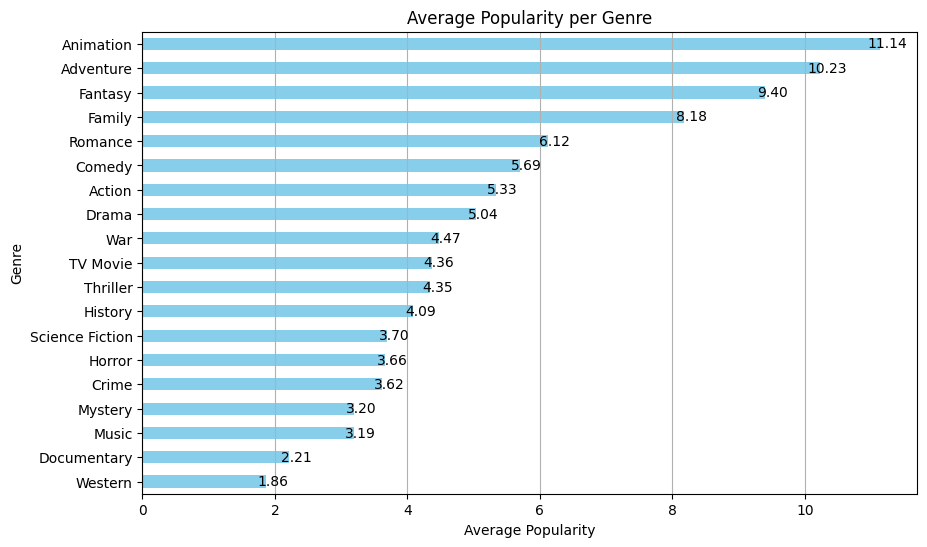

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Explode genres column
data_genres = data.assign(genres=data['genres'].str.split(', ')).explode('genres').reset_index(drop=True)

# Calculate average popularity per genre
avg_popularity_per_genre = data_genres.groupby('genres')['popularity'].mean()

# Sort genres by popularity in descending order
avg_popularity_per_genre_sorted = avg_popularity_per_genre.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
bars = avg_popularity_per_genre_sorted.plot(kind='barh', color='skyblue')
plt.title('Average Popularity per Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.grid(axis='x')

# Annotate each bar with its value
for bar in bars.patches:
    plt.annotate(format(bar.get_width(), '.2f'), 
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2), 
                 ha='center', 
                 va='center', 
                 xytext=(5, 0), 
                 textcoords='offset points')

plt.show()


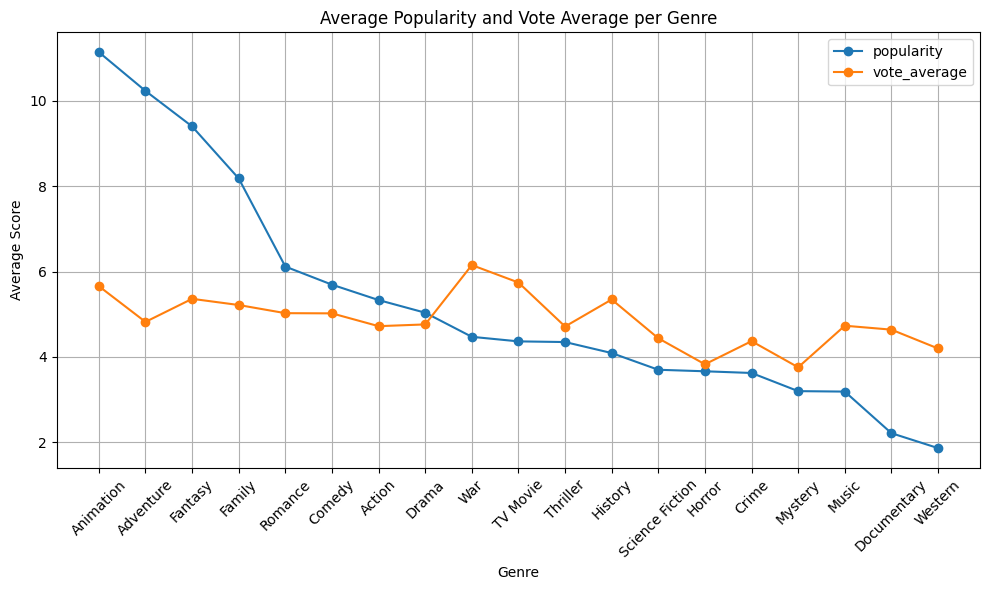

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Split the genres column into separate rows
data_genres = data.assign(genres=data['genres'].str.split(', ')).explode('genres')

# Calculate the average popularity and vote average for each genre
genre_metrics = data_genres.groupby('genres')[['popularity', 'vote_average']].mean()

# Sort genres by popularity in descending order
genre_metrics_sorted = genre_metrics.sort_values(by='popularity', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
for column in genre_metrics_sorted.columns:
    plt.plot(genre_metrics_sorted.index, genre_metrics_sorted[column], marker='o', label=column)

plt.title('Average Popularity and Vote Average per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_1442/4099164491.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_popularity_6months = data.set_index('release_date').resample('6M')['popularity'].mean()


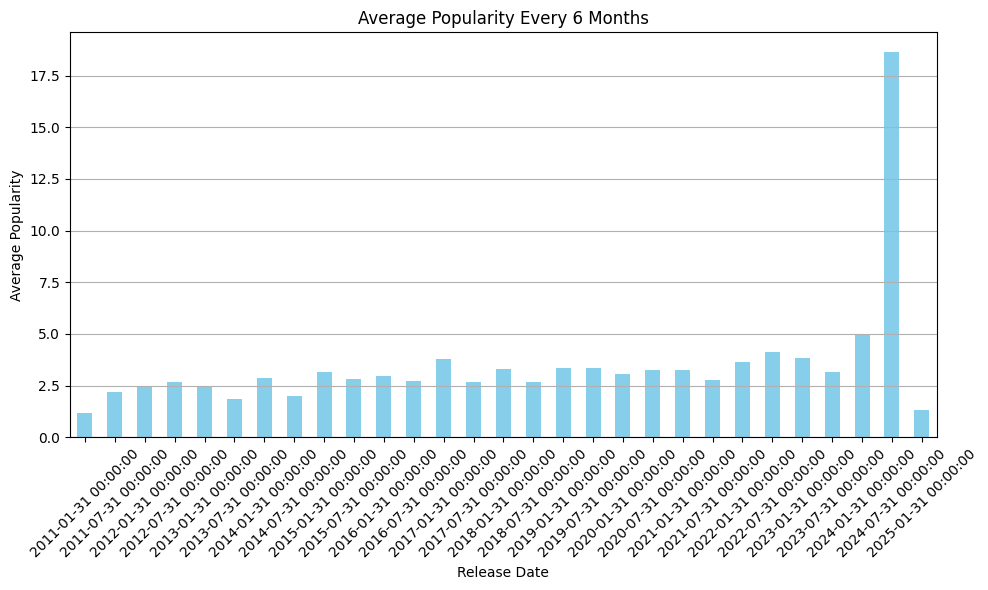

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'release_date' to datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Resample data for every 6 months and calculate average popularity
avg_popularity_6months = data.set_index('release_date').resample('6M')['popularity'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_popularity_6months.plot(kind='bar', color='skyblue')

plt.title('Average Popularity Every 6 Months')
plt.xlabel('Release Date')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


We chose this diagram because it shows how popular certain movie types are in each continent. We wanted to visualize our data in a more effective manner by considering continents and the various genres of movies. We performed initial data cleaning, but further cleaning is still required. Our dataset was reduced from 900,000 rows to 120,000 rows. The main filtering criteria included selecting movies released after 2010 and before the end of summer 2024. Additionally, we removed unnecessary columns and filtered out NaN data, such as movies with a runtime of 0.